# Учебное задание: Определить уровень зарплаты сотрудников на основе данных об их опыте
В одной из компаний для найма сотрудников решили создать математическую модель, описывающую зависимость уровня заработной платы от опыта сотрудников. В файлах ‘inputs.npy’, ‘outputs.npy’ даны оценки заработной платы и опыта сотрудников, представленные в своих диапазонах и полученные в результате использования шкалы перевода.

В компании разработали простейшую нейронную сеть model с ошибкой loss. Обучи нейронную сеть предсказывать необходимые значения. В качестве ответа к заданию предскажи 5 точек [1, 2, 3, 4, 5] при помощи нейронной сети любой модели. Ответ выдайте в формате JSON:

{
  "answer": ["x1", "x2", "x3", ... , "x5"]
}
      



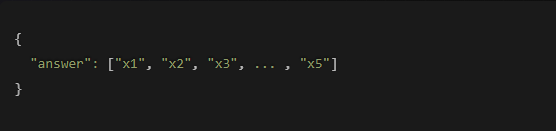

# Setup & Import

In [7]:
# Import
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from collections import Counter

# Metric

In [ ]:
# Original at site https://open-data-battle.geecko.com/issues/predict
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Модель
class myModel(object):
  def __init__(self):
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(10.0)

  def __call__(self, x):
    return self.W * x + self.b

model = myModel()

# Ошибка
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())
Current loss: 64.301849


# Load Data

In [10]:
inputs = np.load('/content/inputs.npy')
outputs = np.load('/content/outputs.npy')

In [11]:
inputs.shape, outputs.shape
inputs[:5], outputs[:5]

(array([-0.7150358, -1.7290071,  1.9302819,  1.9619546, -0.5580657],
       dtype=float32),
 array([-2.350982 , -6.686186 , 14.57553  , 15.004372 , -2.2539327],
       dtype=float32))

# Explore Data

In [12]:
unique_vals, unique_cnt = np.unique(np.isnan(inputs), return_counts = True) 
print(unique_vals, unique_cnt)

unique_vals, unique_cnt = np.unique(inputs==0.0, return_counts = True) 
print(unique_vals, unique_cnt)

unique_vals, unique_cnt = np.unique(outputs==0.0, return_counts = True) 
print(unique_vals, unique_cnt)

unique_vals, unique_cnt = np.unique(np.isnan(outputs), return_counts = True) 
print(unique_vals, unique_cnt)

inputs.min(), inputs.max(), outputs.min(), outputs.max()

[False] [1000]
[False] [1000]
[False] [1000]
[False] [1000]


(-4.120422, 3.1408827, -23.980309, 21.008589)

In [14]:
print(len(Counter(outputs)), 'Original dataset shape %s' % Counter(outputs))

1000 Original dataset shape Counter({-2.350982: 1, -6.686186: 1, 14.57553: 1, 15.004372: 1, -2.2539327: 1, 10.91553: 1, 4.3139243: 1, 1.0440235: 1, 2.476209: 1, 5.581546: 1, -1.0793127: 1, -8.915342: 1, 8.117587: 1, -8.448012: 1, -6.573431: 1, -4.237154: 1, 0.42881334: 1, -0.14890689: 1, -6.4672112: 1, 9.75306: 1, 0.83711433: 1, -8.668971: 1, 0.28865248: 1, 3.151327: 1, 1.4076841: 1, 13.834408: 1, 0.3381223: 1, -2.927495: 1, 3.380414: 1, 1.4459834: 1, -4.171597: 1, -0.8162421: 1, 10.652168: 1, -2.5707: 1, 3.2308152: 1, -7.872946: 1, -3.5100636: 1, -3.4074938: 1, 3.9998927: 1, -16.78338: 1, 5.0252676: 1, -4.3629746: 1, -1.0988724: 1, 4.5256763: 1, 5.099565: 1, -0.8634725: 1, -0.027852505: 1, 4.607936: 1, 4.2608957: 1, 4.4338036: 1, 5.8015447: 1, 1.4781058: 1, -7.9797354: 1, 2.3911653: 1, 3.4885223: 1, 2.408844: 1, 9.714245: 1, 9.256778: 1, 1.3432596: 1, -6.8680596: 1, 6.6733212: 1, -0.0084014535: 1, -1.8778446: 1, 4.1638517: 1, 5.3510623: 1, 5.4975133: 1, -11.813476: 1, -2.4588387: 1, -

# Prepare train/test datasets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    inputs.reshape(-1, 1), outputs, test_size=0.1, random_state=13)


In [ ]:
X_train.shape, y_train.shape, inputs.shape, outputs.shape

((900, 1), (900,), (1000,), (1000,))

# Models

## GradientBoostingRegressor

In [ ]:
params = {'n_estimators': 1000,
          'max_depth': 2,
          'min_samples_split': 10,
          'learning_rate': 0.01,
          #'loss': 'squared_error'
          #'loss': 'mean_squared_error'
          }
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

x_val = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
print(reg.predict(x_val))

The mean squared error (MSE) on test set: 0.9926
[ 8.10200191 14.23239057 18.9341969  20.4931389  20.4931389 ]


**Вывод**
1. Для рзаных значений на входе - одинаковые занчения на выходе [4,5] -> [20.4931389  20.4931389] - это неправильно

## RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#X, y = make_regression(n_features=4, n_informative=2,
#                       random_state=0, shuffle=False)
X, y= inputs.reshape(-1,1), outputs
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13)

regr = RandomForestRegressor(max_depth=5, 
                             random_state=13, # 0
                             #learning_rate = 0.01,
                             n_estimators = 100,
                             )
#regr.fit(X, y)
regr.fit(X_train, y_train)

#mse = mean_squared_error(X, regr.predict(X))
mse = mean_squared_error(y_test, regr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

x_val = np.array([1, 2, 3, 4,5]).reshape(-1,1)
print(list(regr.predict(x_val)))

The mean squared error (MSE) on test set: 1.0230
[8.117611803894114, 14.278540939356251, 19.155575226200266, 20.00103865741548, 20.00103865741548]


In [ ]:
predict_res = list(regr.predict(x_val))
answer_val = [str(i) for i in predict_res]
answer = {"answer": answer_val}
print(answer)
#
"""
{'answer': [8.117611803894114, 14.278540939356251, 19.155575226200266, 20.00103865741548, 20.00103865741548]}
неверный формат
{'answer': ['8.117611803894114', '14.278540939356251', '19.155575226200266', '20.00103865741548', '20.00103865741548']}
неверный формат
{
 "answer" :  ["8.117611803894114", "14.278540939356251", "19.155575226200266", "20.00103865741548", "20.00103865741548"]
}
Это неверный ответ

{
  "answer" :  ["8.1176118", "14.2785409", "19.1555752", "20.0010386", "20.0010386"]
}
Тоже неверный ответ
max x  3.1408827   
max y 21.008589
"""

{'answer': ['8.117611803894114', '14.278540939356251', '19.155575226200266', '20.00103865741548', '20.00103865741548']}


In [ ]:
print(f"Ошибка - {mse/(outputs.max()- outputs.min())*100:1.2f}%")

Ошибка - 2.27%


**Вывод**
1. Для рзаных значений на входе - одинаковые занчения на выходе [4,5] -> ["20.0010386", "20.0010386"] - это опять неправильно

## DecisionTreeRegressor

In [ ]:
from sklearn import tree
#X = [[0, 0], [2, 2]]
# y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict(x_val)

array([ 8.5528326 , 13.71122837, 18.17923164, 21.00858879, 21.00858879])

**Вывод**
1. Для рзаных значений на входе - одинаковые занчения на выходе [4,5] -> [21.00858879, 21.00858879] - это опять неправильно

## LightGBMRegressor

### Setup LightGBM

In [ ]:
!git clone --recursive https://github.com/microsoft/LightGBM
%cd LightGBM
!mkdir build
%cd build
!cmake ..
!make -j4

Cloning into 'LightGBM'...
remote: Enumerating objects: 24781, done.
remote: Counting objects: 100% (420/420), done.
remote: Compressing objects: 100% (266/266), done.
remote: Total 24781 (delta 246), reused 249 (delta 151), pack-reused 24361
Receiving objects: 100% (24781/24781), 18.47 MiB | 24.19 MiB/s, done.
Resolving deltas: 100% (18224/18224), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'external_libs/compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'external_libs/eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/content/LightGBM/external_libs/compute'...
remote: Enumerating objects: 21733, done.        
remote: Counting objects: 100% (5/5), done.        
remote: Co

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
# evaluate lightgbm ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from lightgbm import LGBMRegressor

# define dataset
#X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model

model = LGBMRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.923 (0.071)


### Train Model

In [ ]:
%%time
# fit the model on the whole dataset
#model.fit(X_train, y_train)
model.fit(inputs.reshape(-1, 1), outputs)

CPU times: user 105 ms, sys: 9.57 ms, total: 115 ms
Wall time: 63.2 ms


LGBMRegressor()

### Predict

In [ ]:
x_val = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
yhat = model.predict(x_val)

print('Predictions:', yhat[:5])

Predictions: [ 8.09998815 14.11889939 16.94142367 16.94142367 16.94142367]


## Простая Dense сеть

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
input_shape = (1)
model = tf.keras.Sequential (
    [
        tf.keras.Input(shape=input_shape),
        layers.Dense(1024, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(1024, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(1, activation='linear'),
        
        
    ]
)

model.summary()


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1024)              2048      
_________________________________________________________________
dropout_16 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_17 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)               

In [ ]:
batch_size = 24
epochs = 20

model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-2), loss='mse', metrics=['mae'])



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
34/34 [==============================] - 1s 17ms/step - loss: 18.2450 - mae: 2.9414 - val_loss: 3.7333 - val_mae: 1.6595
Epoch 2/20
34/34 [==============================] - 0s 14ms/step - loss: 2.3018 - mae: 1.1870 - val_loss: 1.5355 - val_mae: 0.9832
Epoch 3/20
34/34 [==============================] - 0s 13ms/step - loss: 2.2142 - mae: 1.1544 - val_loss: 1.2802 - val_mae: 0.8941
Epoch 4/20
34/34 [==============================] - 0s 14ms/step - loss: 2.0194 - mae: 1.1057 - val_loss: 1.5825 - val_mae: 0.9872
Epoch 5/20
34/34 [==============================] - 0s 13ms/step - loss: 1.7233 - mae: 1.0399 - val_loss: 1.2521 - val_mae: 0.8807
Epoch 6/20
34/34 [==============================] - 0s 14ms/step - loss: 2.7107 - mae: 1.2392 - val_loss: 1.9632 - val_mae: 1.1025
Epoch 7/20
34/34 [==============================] - 0s 13ms/step - loss: 2.2975 - mae: 1.1704 - val_loss: 2.3524 - val_mae: 1.2523
Epoch 8/20
34/34 [==============================] - 0s 13ms/step - loss: 2.1741 - 

In [ ]:
predict_res = model.predict(x_val)
print(predict_res)

[[ 7.7566724]
 [13.418584 ]
 [19.099247 ]
 [24.57265  ]
 [29.858618 ]]


In [ ]:
import math
answer_val = [str(round(i[0],12)).replace("'",'"') for i in predict_res]
answer = {'answer': answer_val}
print(answer)

{'answer': ['7.756672', '13.418584', '19.099247', '24.57265', '29.858618']}


In [ ]:
{ 
  "answer": ["7.756672", "13.418584", "19.099247", "24.57265", "29.858618"]
}

In [ ]:
answer

{'answer': [7.756672, 13.418584, 19.099247, 24.57265, 29.858618]}

**Вывод**
1. Да, теперь прошло правильно